# Ejercicio 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def probabilidad_de_caracter(texto):
    """Calcula la probabilidad de cada caracter en el texto dado.
    
    Args:
        texto (str): El texto del cual se calcularán las probabilidades de los caracteres.
        
    Returns:
        dict: Un diccionario donde las claves son los caracteres y los valores son sus probabilidades.
    """
    total_caracteres = len(texto)
    frecuencias = {}
    
    #Pongo todos los caracteres en minuscula para no diferenciar por ejemplo las A de las a.
    for caracter in texto:
        if caracter.lower() in frecuencias:
            frecuencias[caracter.lower()] += 1
        else:
            frecuencias[caracter.lower()] = 1
            
    probabilidades = {caracter: frecuencia / total_caracteres for caracter, frecuencia in frecuencias.items()}
    probabilidades = dict(sorted(probabilidades.items()))

    return probabilidades

#Leo los archivos de textos para extraer los textos

with open('adn.txt', 'r', encoding='utf-8') as file:
    adn_texto = file.read()
    file.close()
with open('mitología.txt', 'r', encoding='utf-8') as file:
    mitologia_texto = file.read()
    file.close()
with open('tabla.txt', 'r', encoding='utf-8') as file:
    tabla_texto = file.read()
    file.close()

#Calculo las probabilidades de cada caracter en los textos
adn_probabilidades = probabilidad_de_caracter(adn_texto)
mitologia_probabilidades = probabilidad_de_caracter(mitologia_texto)
tabla_probabilidades = probabilidad_de_caracter(tabla_texto)

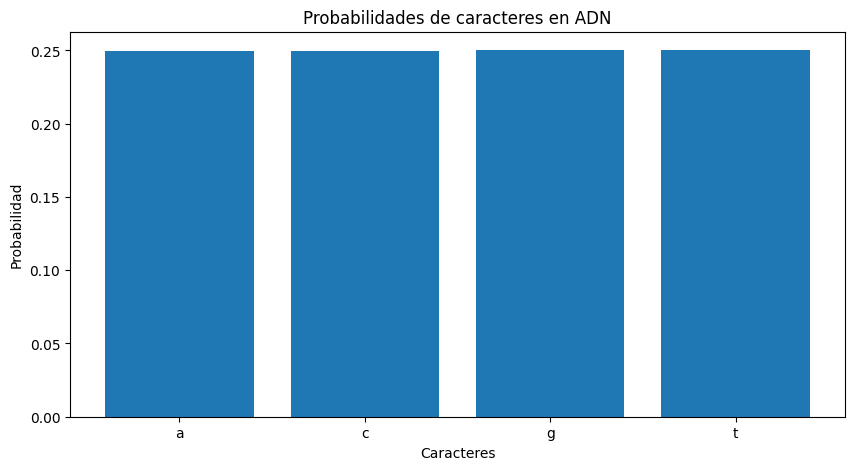

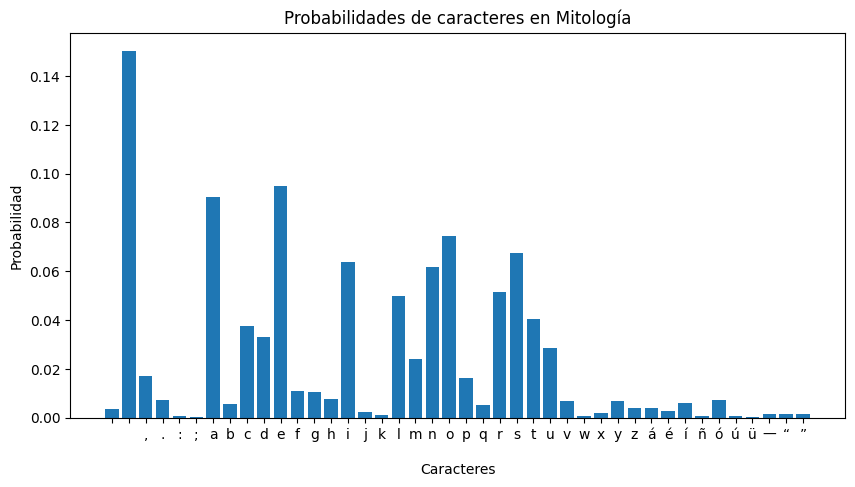

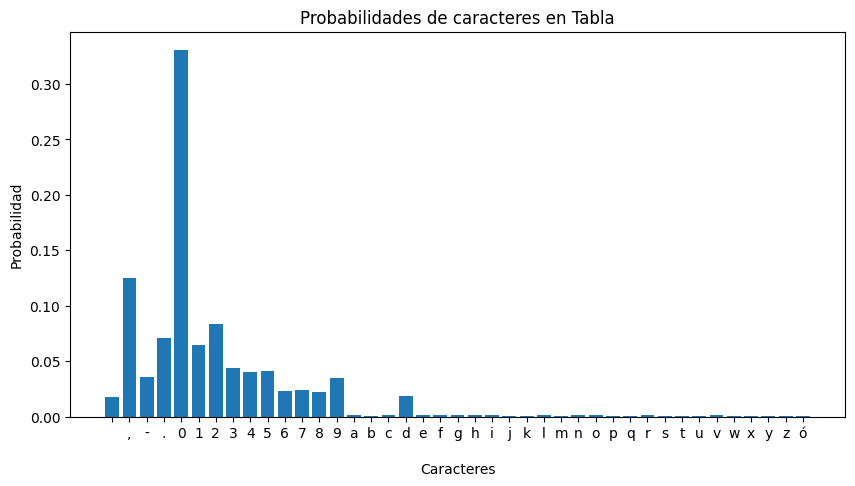

In [3]:
#Grafico las probabilidades del adn.txt
plt.figure(figsize=(10, 5))
plt.bar(adn_probabilidades.keys(), adn_probabilidades.values())
plt.title('Probabilidades de caracteres en ADN')
plt.xlabel('Caracteres')
plt.ylabel('Probabilidad')
plt.show()

#grafico las probabilidades del mitología.txt
plt.figure(figsize=(10, 5))
plt.bar(mitologia_probabilidades.keys(), mitologia_probabilidades.values())
plt.title('Probabilidades de caracteres en Mitología')
plt.xlabel('Caracteres')
plt.ylabel('Probabilidad')
plt.show()

#rGafico las probabilidades del tabla.txt
plt.figure(figsize=(10, 5))
plt.bar(tabla_probabilidades.keys(), tabla_probabilidades.values())
plt.title('Probabilidades de caracteres en Tabla')
plt.xlabel('Caracteres')
plt.ylabel('Probabilidad')
plt.show()

# Ejercicio 2

In [4]:
# Función provista
def huffman_code(prob_dict):
    """genera un código Huffman a partir de las probabilidades dadas
       en el diccionario "prob_dict"
       Retorna un diccionario con el código de Huffman para cada símbolo"""
    # Crear lista de nodos: cada nodo es (probabilidad, símbolo o subárbol)
    nodes = [(p, {char: ''}) for char, p in prob_dict.items()]

    while len(nodes) > 1:
        # Ordenar nodos por probabilidad
        nodes = sorted(nodes, key=lambda x: x[0])

        # Tomar los dos de menor probabilidad
        p1, c1 = nodes.pop(0)
        p2, c2 = nodes.pop(0)

        # Agregar prefijo 0 al primer subárbol y 1 al segundo
        c1 = {k: '0' + v for k, v in c1.items()}
        c2 = {k: '1' + v for k, v in c2.items()}

        # Fusionar los dos subárboles
        new_node = (p1 + p2, c1 | c2)
        nodes.append(new_node)

    # Retornar el diccionario con el código final (nodes: list[tuple[int, dict]])
    return nodes[0][1]

In [5]:
#Generamos los codigos de Huffman para cada texto
adn_huffman = huffman_code(adn_probabilidades)
mitologia_huffman = huffman_code(mitologia_probabilidades)
tabla_huffman = huffman_code(tabla_probabilidades)

#Printeamos para ver los codigos de Huffman de cada texto
print(adn_huffman)
print(mitologia_huffman)
print(tabla_huffman)

#Calculamos la longitud promedio de bits para la codificacion no uniforme
def longitud_promedio(prob_dict, code_dict):
    """Calcula la longitud promedio de bits para una codificación dada.
    
    Args:
        prob_dict (dict): Diccionario de probabilidades de los caracteres.
        code_dict (dict): Diccionario del código de Huffman para los caracteres.
        
    Returns:
        float: La longitud promedio de bits.
    """
    longitud = 0.0
    for char, prob in prob_dict.items():
        longitud += prob * len(code_dict[char])
    return longitud

adn_longitud = longitud_promedio(adn_probabilidades, adn_huffman)
mitologia_longitud = longitud_promedio(mitologia_probabilidades, mitologia_huffman)
tabla_longitud = longitud_promedio(tabla_probabilidades, tabla_huffman)

#Printeamos las longitudes promedio de bits de cada texto
print(f'Longitud promedio de bits para ADN: {adn_longitud}')
print(f'Longitud promedio de bits para Mitología: {mitologia_longitud}')
print(f'Longitud promedio de bits para Tabla: {tabla_longitud}')

{'a': '00', 'c': '01', 'g': '10', 't': '11'}
{'k': '000000000', '—': '000000001', 'é': '00000001', '“': '000000100', '”': '000000101', ':': '0000001100', 'ñ': '0000001101', 'ú': '0000001110', 'w': '00000011110', ';': '000000111110', 'ü': '000000111111', 'g': '000001', 'f': '000010', 'q': '0000110', 'b': '0000111', 'l': '0001', 'e': '001', 'm': '01000', 'í': '0100100', 'v': '0100101', 'y': '0100110', '.': '0100111', 'r': '0101', 'u': '01100', '\n': '01101000', 'z': '01101001', 'ó': '0110101', 'h': '0110110', 'á': '01101110', 'x': '011011110', 'j': '011011111', 'n': '0111', 'i': '1000', 'd': '10010', 'p': '100110', ',': '100111', 's': '1010', 'o': '1011', ' ': '110', 'c': '11100', 't': '11101', 'a': '1111'}
{'2': '000', '5': '0010', '3': '0011', '8': '01000', '6': '01001', '7': '01010', 'n': '010110000', 's': '0101100010', 't': '0101100011', 'u': '0101100100', 'w': '0101100101', 'x': '0101100110', 'y': '0101100111', 'i': '010110100', 'z': '0101101010', 'j': '0101101011', 'a': '010110110'

In [6]:
#Calculamos la cantidad de bits minima para codificacion uniforme

def bits_uniforme(num_simbolos):
    """Calcula la cantidad mínima de bits necesarios para una codificación uniforme.
    
    Args:
        num_simbolos (int): El número de símbolos distintos.
        
    Returns:
        int: La cantidad mínima de bits necesarios.
    """
    return int(np.ceil(np.log2(num_simbolos)))

adn_bits_uniforme = bits_uniforme(len(adn_probabilidades))
mitologia_bits_uniforme = bits_uniforme(len(mitologia_probabilidades))
tabla_bits_uniforme = bits_uniforme(len(tabla_probabilidades))

print(f'Cantidad mínima de bits para codificación uniforme en ADN: {adn_bits_uniforme}')
print(f'Cantidad mínima de bits para codificación uniforme en Mitología: {mitologia_bits_uniforme}')
print(f'Cantidad mínima de bits para codificación uniforme en Tabla: {tabla_bits_uniforme}')

Cantidad mínima de bits para codificación uniforme en ADN: 2
Cantidad mínima de bits para codificación uniforme en Mitología: 6
Cantidad mínima de bits para codificación uniforme en Tabla: 6


In [7]:
#Calculamos el porcentaje de memoria reducido por Huffman respecto a la codificacion uniforme

def porcentaje_reduccion(longitud_promedio, bits_uniforme):
    """Calcula el porcentaje de reducción de memoria al usar codificación Huffman en lugar de codificación uniforme.
    
    Args:
        longitud_promedio (float): La longitud promedio de bits de la codificación Huffman.
        bits_uniforme (int): La cantidad mínima de bits necesarios para la codificación uniforme.
        
    Returns:
        float: El porcentaje de reducción de memoria.
    """
    return ((bits_uniforme - longitud_promedio) / bits_uniforme) * 100

adn_reduccion = porcentaje_reduccion(adn_longitud, adn_bits_uniforme)
mitologia_reduccion = porcentaje_reduccion(mitologia_longitud, mitologia_bits_uniforme)
tabla_reduccion = porcentaje_reduccion(tabla_longitud, tabla_bits_uniforme)

print(f'Porcentaje de reducción de memoria en ADN: {adn_reduccion:.2f}%')
print(f'Porcentaje de reducción de memoria en Mitología: {mitologia_reduccion:.2f}%')
print(f'Porcentaje de reducción de memoria en Tabla: {tabla_reduccion:.2f}%')

Porcentaje de reducción de memoria en ADN: 0.00%
Porcentaje de reducción de memoria en Mitología: 28.31%
Porcentaje de reducción de memoria en Tabla: 41.38%


# Ejercicio 3

In [10]:
def entropia(prob_dict):
    """Calcula la entropía de la fuente de información dada por las probabilidades.
    
    Args:
        prob_dict (dict): Diccionario de probabilidades de los caracteres.
        
    Returns:
        float: La entropía de la fuente de información.
    """
    H = 0.0
    for prob in prob_dict.values():
        if prob > 0:
            H += prob * np.log2(1 / prob)
    return H

adn_entropia = entropia(adn_probabilidades)
mitologia_entropia = entropia(mitologia_probabilidades)
tabla_entropia = entropia(tabla_probabilidades)

print(f'Entropía de la fuente de información en ADN: {adn_entropia:.4f} bits/símbolo')
print(f'Entropía de la fuente de información en Mitología: {mitologia_entropia:.4f} bits/símbolo')
print(f'Entropía de la fuente de información en Tabla: {tabla_entropia:.4f} bits/símbolo')

#Comparamos la entropia con la longitud promedio de codificación

print(f'Comparación en ADN: Entropía = {adn_entropia:.4f}, Longitud Promedio = {adn_longitud:.4f}')
print(f'Comparación en Mitología: Entropía = {mitologia_entropia:.4f}, Longitud Promedio = {mitologia_longitud:.4f}')
print(f'Comparación en Tabla: Entropía = {tabla_entropia:.4f}, Longitud Promedio = {tabla_longitud:.4f}')

#"""
#ACA METER LAS CONCLUSIONES DEL LO QUE EXTRAIMOS DE LOS RESULTADOS (AUNQUE VAN EN EL INFORME)
#"""


Entropía de la fuente de información en ADN: 2.0000 bits/símbolo
Entropía de la fuente de información en Mitología: 4.2686 bits/símbolo
Entropía de la fuente de información en Tabla: 3.4677 bits/símbolo
Comparación en ADN: Entropía = 2.0000, Longitud Promedio = 2.0000
Comparación en Mitología: Entropía = 4.2686, Longitud Promedio = 4.3013
Comparación en Tabla: Entropía = 3.4677, Longitud Promedio = 3.5173


# Ejercicio 4

In [11]:
def entropia_normalizada(prob_dict):
    """Calcula la entropía normalizada de la fuente de información dada por las probabilidades.
    
    Args:
        prob_dict (dict): Diccionario de probabilidades de los caracteres.
        
    Returns:
        float: La entropía normalizada de la fuente de información.
    """
    H = entropia(prob_dict)
    H_max = np.log2(len(prob_dict)) if len(prob_dict) > 0 else 1
    return H / H_max if H_max > 0 else 0

adn_entropia_norm = entropia_normalizada(adn_probabilidades)
mitologia_entropia_norm = entropia_normalizada(mitologia_probabilidades)
tabla_entropia_norm = entropia_normalizada(tabla_probabilidades)

print(f'Entropía normalizada en ADN: {adn_entropia_norm:.4f}')
print(f'Entropía normalizada en Mitología: {mitologia_entropia_norm:.4f}')
print(f'Entropía normalizada en Tabla: {tabla_entropia_norm:.4f}')

Entropía normalizada en ADN: 1.0000
Entropía normalizada en Mitología: 0.7916
Entropía normalizada en Tabla: 0.6473
